# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
# Loop through cities making the API call
i = 1
for city in cities:
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    print(query_url)
    pprint(response)
    break
    response['wind'][deg]

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b6aeb730a710e7a97cea736a4e489585&q=ponta do sol
{'base': 'stations',
 'clouds': {'all': 45},
 'cod': 200,
 'coord': {'lat': 32.6667, 'lon': -17.1},
 'dt': 1628223824,
 'id': 2264557,
 'main': {'feels_like': 73.78,
          'grnd_level': 1020,
          'humidity': 82,
          'pressure': 1020,
          'sea_level': 1020,
          'temp': 72.93,
          'temp_max': 75,
          'temp_min': 71.13},
 'name': 'Ponta do Sol',
 'sys': {'country': 'PT',
         'id': 2008291,
         'sunrise': 1628231155,
         'sunset': 1628280159,
         'type': 2},
 'timezone': 3600,
 'visibility': 9667,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 8, 'gust': 7.07, 'speed': 3.87}}


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
i = 0
set = 1
# Create an empty list to store the responses
humidity = []
cloudiness = []
wind_speed = []
lat = []
city_name = []
lng = []
max_temp = []
country = []
date = []

# Loop through cities making the API call

for city in cities:
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    i+=1
    
    # get city weather data for 50 cities as set 1 and then then continue with the next 50 cities for next set
    if i == 51:
        i = 1
        set+= 1
    print(f"Processing Record {i} of Set {set}|{city}")
    try:
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        lat.append(response["coord"]["lat"])
        city_name.append(response["name"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
    except KeyError:
        print("City not found. Skipping...")
    
        

Processing Record 1 of Set 1|ponta do sol
Processing Record 2 of Set 1|zehdenick
Processing Record 3 of Set 1|honiara
Processing Record 4 of Set 1|busselton
Processing Record 5 of Set 1|barbar
City not found. Skipping...
Processing Record 6 of Set 1|dingle
Processing Record 7 of Set 1|taolanaro
City not found. Skipping...
Processing Record 8 of Set 1|campos novos
Processing Record 9 of Set 1|portland
Processing Record 10 of Set 1|avarua
Processing Record 11 of Set 1|albany
Processing Record 12 of Set 1|faanui
Processing Record 13 of Set 1|zwettl
Processing Record 14 of Set 1|saint anthony
Processing Record 15 of Set 1|puerto ayora
Processing Record 16 of Set 1|cape town
Processing Record 17 of Set 1|puerto escondido
Processing Record 18 of Set 1|mataura
Processing Record 19 of Set 1|elliot
Processing Record 20 of Set 1|hirara
Processing Record 21 of Set 1|alofi
Processing Record 22 of Set 1|krasnoselkup
Processing Record 23 of Set 1|wani
Processing Record 24 of Set 1|butaritari
Process

Processing Record 46 of Set 4|ferme-neuve
Processing Record 47 of Set 4|college
Processing Record 48 of Set 4|cayenne
Processing Record 49 of Set 4|baruun-urt
Processing Record 50 of Set 4|paytug
City not found. Skipping...
Processing Record 1 of Set 5|sola
Processing Record 2 of Set 5|hopkinsville
Processing Record 3 of Set 5|labuhan
Processing Record 4 of Set 5|vernon
Processing Record 5 of Set 5|finschhafen
Processing Record 6 of Set 5|port blair
Processing Record 7 of Set 5|les cayes
Processing Record 8 of Set 5|samarai
Processing Record 9 of Set 5|ambulu
Processing Record 10 of Set 5|asau
Processing Record 11 of Set 5|cairns
Processing Record 12 of Set 5|bilma
Processing Record 13 of Set 5|bengkulu
Processing Record 14 of Set 5|baley
Processing Record 15 of Set 5|pavilosta
Processing Record 16 of Set 5|blonduos
City not found. Skipping...
Processing Record 17 of Set 5|olavarria
Processing Record 18 of Set 5|sumbawa
City not found. Skipping...
Processing Record 19 of Set 5|dhing
Pr

Processing Record 45 of Set 8|mutum
Processing Record 46 of Set 8|qaanaaq
Processing Record 47 of Set 8|bud
Processing Record 48 of Set 8|brae
Processing Record 49 of Set 8|lashio
Processing Record 50 of Set 8|nome
Processing Record 1 of Set 9|nuqui
Processing Record 2 of Set 9|tahoua
Processing Record 3 of Set 9|bitung
Processing Record 4 of Set 9|nehe
Processing Record 5 of Set 9|riyadh
Processing Record 6 of Set 9|gornopravdinsk
Processing Record 7 of Set 9|strezhevoy
Processing Record 8 of Set 9|tiksi
Processing Record 9 of Set 9|inhambane
Processing Record 10 of Set 9|isaka
Processing Record 11 of Set 9|beringovskiy
Processing Record 12 of Set 9|formosa
Processing Record 13 of Set 9|saint-pierre
Processing Record 14 of Set 9|kavieng
Processing Record 15 of Set 9|nguruka
Processing Record 16 of Set 9|bonavista
Processing Record 17 of Set 9|anchorage
Processing Record 18 of Set 9|vryburg
Processing Record 19 of Set 9|santa eulalia del rio
City not found. Skipping...
Processing Recor

Processing Record 41 of Set 12|owensboro
Processing Record 42 of Set 12|buala
Processing Record 43 of Set 12|kovdor
Processing Record 44 of Set 12|palaikastron
Processing Record 45 of Set 12|roald
Processing Record 46 of Set 12|prince rupert
Processing Record 47 of Set 12|richards bay
Processing Record 48 of Set 12|moerai
Processing Record 49 of Set 12|cam ranh
Processing Record 50 of Set 12|chico
Processing Record 1 of Set 13|morondava
Processing Record 2 of Set 13|pitimbu
Processing Record 3 of Set 13|kenitra
Processing Record 4 of Set 13|ilulissat
Processing Record 5 of Set 13|boyolangu
Processing Record 6 of Set 13|humen
Processing Record 7 of Set 13|vicksburg
Processing Record 8 of Set 13|lagoa
Processing Record 9 of Set 13|west bay
Processing Record 10 of Set 13|nieves
Processing Record 11 of Set 13|kanbe
Processing Record 12 of Set 13|nassau
Processing Record 13 of Set 13|port-gentil
Processing Record 14 of Set 13|cap malheureux
Processing Record 15 of Set 13|kimbe
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Display the DataFrame
weather_data = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng, 
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_df= pd.DataFrame(weather_data)
weather_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ponta do Sol,32.6667,-17.1000,75.00,82,45,3.87,PT,1628223824
1,Zehdenick,52.9785,13.3317,63.88,85,100,3.38,DE,1628224179
2,Honiara,-9.4333,159.9500,82.98,65,37,3.22,SB,1628223835
3,Busselton,-33.6500,115.3333,66.04,66,0,14.97,AU,1628223844
4,Dingle,10.9995,122.6711,89.62,58,82,16.82,PH,1628223860


In [6]:
# Display the DataFrame summary table
date = weather_df.describe()

In [7]:
# export city data into a .csv
weather_df.to_csv('output_data/cities.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Use loc to filter out cities that have humidity > 100%
cities_humidity_df = weather_df.loc[weather_df['Humidity'] > 100, ["Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Date"]]
cities_humidity_df.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [9]:
import datetime
city_date = datetime.datetime.fromtimestamp(int(weather_df["Date"][0])).strftime('%Y-%m-%d')

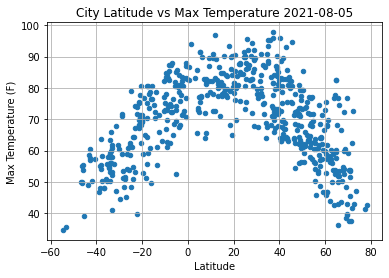

In [10]:
weather_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True)
plt.title(f"City Latitude vs Max Temperature {city_date}") 
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

#### The above scatter plot shows the relationship between temperature and the latitude. The results indicate that the temperature is warmer for cities that are closer to the equator, specifically in the latitude range of 0 to 40. The cities outside the latitude range of 0 to 40 have cooler temperatures.

## Latitude vs. Humidity Plot

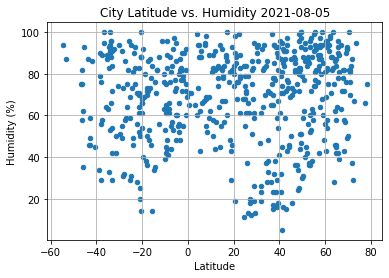

In [11]:
weather_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True)
plt.title(f"City Latitude vs. Humidity {city_date}")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

#### The above scatter plot shows the relationship between the city latitude and humidity. The plot indicates that the humidity is fairly distributed. The latitude proximity to the equator does not mean lower or higher humidity percentages.

## Latitude vs. Cloudiness Plot

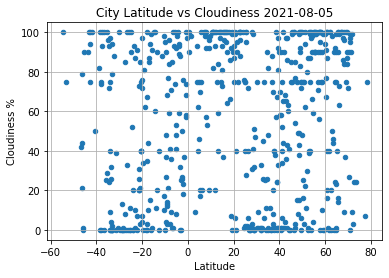

In [12]:
weather_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, )
plt.title(f"City Latitude vs Cloudiness {city_date}")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

#### The above scatter plot shows that there is no relationship between the city latitude and cloudiness. The plot indicates that the cloudiness percentage is fairly distributed.

## Latitude vs. Wind Speed Plot

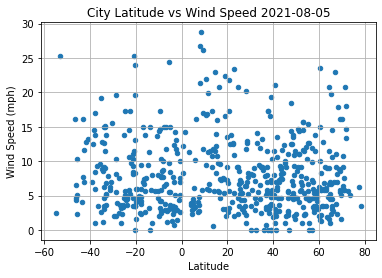

In [13]:
weather_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, )
plt.title(f"City Latitude vs Wind Speed {city_date}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

#### The above scatter plot shows the relationship between the city latitude and wind speed. The plot indicates that the wind speed is slightly higher if closer to the equator, or in the latitude range of -40 to 60.

## Linear Regression

In [14]:
# Northern and Southern Hemispheres - DataFrames
northern_df = weather_df.loc[weather_df["Lat"] >= 0]
southern_df = weather_df.loc[weather_df["Lat"] < 0]

In [15]:
# Linear regression function
def linear_regression(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    return [line_eq, rvalue]
# Line annotation function
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.49576616821781627


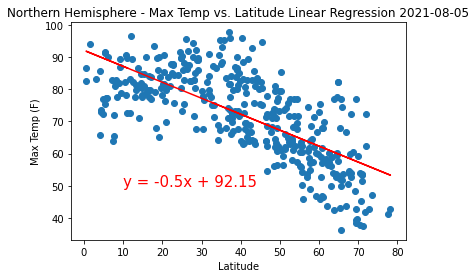

In [16]:
equation = linear_regression(northern_df["Lat"], northern_df["Max Temp"])
annotate(equation[0], 10, 50)
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression {city_date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is : {equation[1]**2}")
plt.savefig("output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

#### The above linear regression scatter plot shows the relationship between the city latitude within the Northern Hemisphere and temperature. The result indicates that there is a negative correlation between temperature and latitude. The temperature is higher as you are closer to the equator, latitude 0.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.5918340630570195


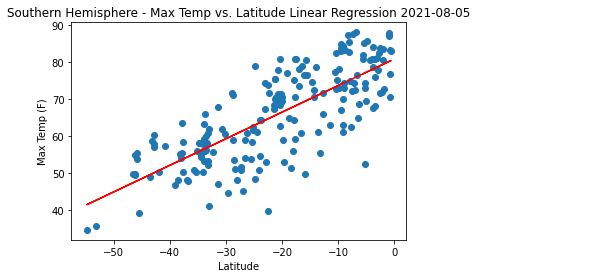

In [17]:
equation = linear_regression(southern_df["Lat"], southern_df["Max Temp"])
annotate(equation[0], 10, 50)
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression {city_date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is : {equation[1]**2}")
plt.savefig("output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")


#### The above linear regression scatter plot shows the relationship between the latitude and temperature in the Southern Hemisphere. The result indicates that there is a strong, positive correlation between temperature and latitude. The closer you are to the equator (0), the higher the temperature. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.002484942875052845


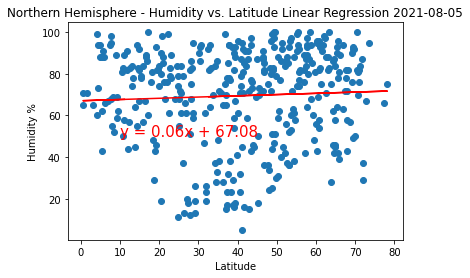

In [18]:
equation = linear_regression(northern_df["Lat"], northern_df["Humidity"])
annotate(equation[0], 10, 50)
plt.title(f"Northern Hemisphere - Humidity vs. Latitude Linear Regression {city_date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
print(f"The r-squared is : {equation[1]**2}")
plt.savefig("output_data/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")

#### The above linear regression scatter plot shows the relationship between the latitude and humidity in the Northern Hemisphere. The result indicates that there is no correlation between humidity and latitude. The closer you are to the equator (0), does not impact the humidity percentage. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.0001820597519209365


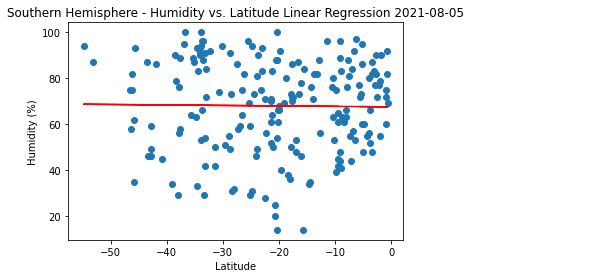

In [19]:
equation = linear_regression(southern_df["Lat"], southern_df["Humidity"])
annotate(equation[0], 10, 50)
plt.title(f"Southern Hemisphere - Humidity vs. Latitude Linear Regression {city_date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is : {equation[1]**2}")
plt.savefig("output_data/Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")

#### The above linear regression scatter plot shows the relationship between the latitude and humidity in the Southern Hemisphere. The result indicates that there is no correlation between humidity and latitude. The closer you are to the equator (0), does not impact the humidity percentage. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.000999450582008867


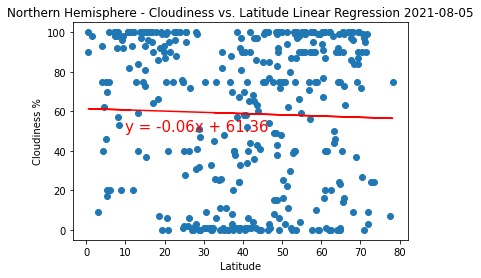

In [20]:
equation = linear_regression(northern_df["Lat"], northern_df["Cloudiness"])
annotate(equation[0], 10, 50)
plt.title(f"Northern Hemisphere - Cloudiness vs. Latitude Linear Regression {city_date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
print(f"The r-squared is : {equation[1]**2}")
plt.savefig("output_data/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

#### The above linear regression scatter plot shows the relationship between the latitude and cloudiness in the Northern Hemisphere. The result indicates that there is no correlation between the cloudiness and latitude. The closer you are to the equator (0), does not impact the cloudiness percentage. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 9.635058953349872e-05


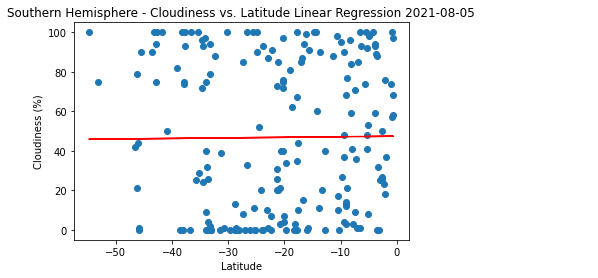

In [21]:
equation = linear_regression(southern_df["Lat"], southern_df["Cloudiness"])
annotate(equation[0], 10, 50)
plt.title(f"Southern Hemisphere - Cloudiness vs. Latitude Linear Regression {city_date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is : {equation[1]**2}")
plt.savefig("output_data/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

#### The above linear regression scatter plot shows the relationship between the latitude and cloudiness in the Southern Hemisphere. The result indicates that there is no correlation between the cloudiness percentage and latitude. The closer you are to the equator (0), does not impact the cloudiness percentage. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.016877938240244937


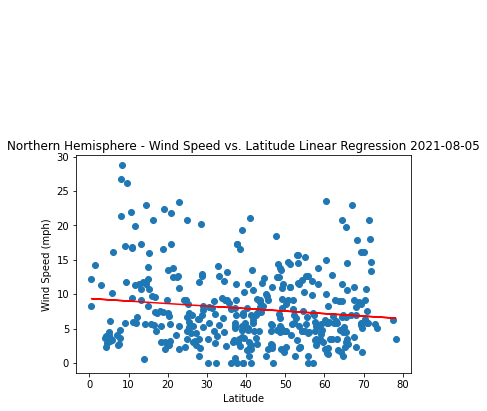

In [22]:
equation = linear_regression(northern_df["Lat"], northern_df["Wind Speed"])
annotate(equation[0], 10, 50)
plt.title(f"Northern Hemisphere - Wind Speed vs. Latitude Linear Regression {city_date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is : {equation[1]**2}")
plt.savefig("output_data/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

#### The above linear regression scatter plot shows the relationship between the latitude and wind speed in the Northern Hemisphere. The result indicates that there is no correlation between the wind speed and latitude. The closer you are to the equator (0), does not impact the wind speed. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.018204702150422775


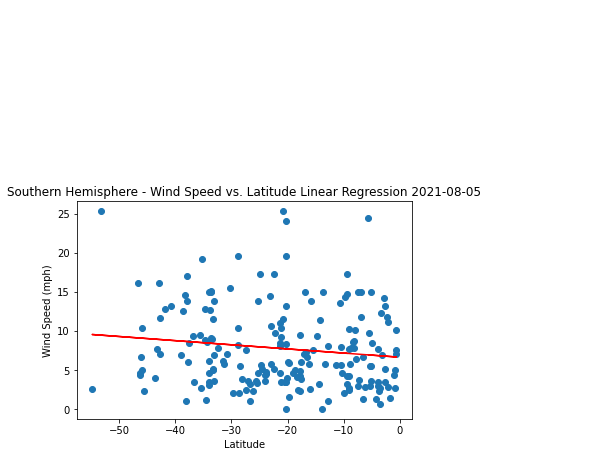

In [23]:
equation = linear_regression(southern_df["Lat"], southern_df["Wind Speed"])
annotate(equation[0], 10, 50)
plt.title(f"Southern Hemisphere - Wind Speed vs. Latitude Linear Regression {city_date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is : {equation[1]**2}")
plt.savefig("output_data/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

#### The above linear regression scatter plot shows the relationship between the latitude and wind speed in the Southern Hemisphere. The result indicates that there is a slight negative correlation between the wind speed and latitude. The closer you are to the equator (0), the lower the wind speed. 